In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(rc={'figure.figsize':(10,4)})
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import statsmodels.api as sm
from scipy.stats import norm

## Bank Churn

In [3]:
bank_df = pd.read_csv('BANK.xls - Sheet1.csv',skiprows=2)

In [4]:
len(bank_df)

248

In [5]:
bank_df.drop(0,inplace=True)

In [6]:
bank_df.drop(bank_df.tail(2).index,inplace=True)

In [7]:
bank_df.columns

Index(['Unnamed: 0', 'O Loyal', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Pleasant Ambiance', 'Comfortable seating arrangement',
       'Immediate attenttion', 'Good Response on Phone',
       'Errors in Passbook entries', 'Time to issue cheque book',
       'Time to sanction loan', 'Time to clear outstation cheques',
       'Issue of clean currency notes', 'Facility to pay bills',
       'Distance to residence', 'Distance to workplace',
       'Courteous staff behaviour', 'Enough parking place'],
      dtype='object')

In [8]:
bank_df.rename(columns={'Unnamed: 0':'Sr. No','O Loyal':'Response','Unnamed: 2':'Branch','Unnamed: 3':'Occupation','Unnamed: 4':'Age','Unnamed: 5':'Gender'},inplace=True)

In [9]:
bank_df.set_index('Sr. No',inplace=True)

In [10]:
bank_df[bank_df.duplicated()]

,Response,Branch,Occupation,Age,Gender,Pleasant Ambiance,Comfortable seating arrangement,Immediate attenttion,Good Response on Phone,Errors in Passbook entries,Time to issue cheque book,Time to sanction loan,Time to clear outstation cheques,Issue of clean currency notes,Facility to pay bills,Distance to residence,Distance to workplace,Courteous staff behaviour,Enough parking place
Sr. No,,,,,,,,,,,,,,,,,,,


##### Columns with non numeric values

In [11]:
cols_with_non_numeric = [i for i in bank_df.columns if all(bank_df[i].str.match('^-?\d')) == False]

In [12]:
cols_with_non_numeric

['Branch', 'Occupation', 'Gender']

In [13]:
bank_df.drop(bank_df[bank_df['Gender'].str.match('\d') == False].index,inplace=True)

In [14]:
bank_df.drop(bank_df[bank_df['Occupation'].str.match('\d') == False].index,inplace=True)

##### Columns with negative values for score

In [15]:
cols_with_neg_numeric = [i for i in bank_df.columns if len(bank_df[bank_df[i].str.match('^-\d') == False]) != len(bank_df)]

In [16]:
rows_with_non_response = list(np.where(np.any((bank_df[bank_df.columns.drop(['Branch'])].astype(int).values < 0) == True,axis=1)))

In [17]:
len(bank_df[(bank_df[bank_df.columns.drop(['Branch'])].astype(int).values < 0)])

65

##### Dropping rows with Non-response

In [18]:
bank_df.drop(bank_df[(bank_df[bank_df.columns.drop(['Branch'])].astype(int).values < 0)].index,inplace=True)

In [19]:
bank_df.reset_index(inplace=True)

In [20]:
bank_df.head()

,Sr. No,Response,Branch,Occupation,Age,Gender,Pleasant Ambiance,Comfortable seating arrangement,Immediate attenttion,Good Response on Phone,Errors in Passbook entries,Time to issue cheque book,Time to sanction loan,Time to clear outstation cheques,Issue of clean currency notes,Facility to pay bills,Distance to residence,Distance to workplace,Courteous staff behaviour,Enough parking place
0,2,0,B1,1,5,1,10,8,8,6,10,8,9,6,8,6,8,7,10,10
1,3,0,B1,0,5,1,4,8,7,8,5,7,4,5,7,6,8,7,9,6
2,4,0,B1,6,4,2,4,6,6,8,6,4,4,5,6,6,9,6,9,5
3,5,0,B1,1,2,1,10,8,6,10,8,8,5,7,8,7,10,10,5,8
4,6,0,B1,2,3,1,7,8,6,7,8,7,7,7,6,7,8,7,8,7


bank_df = bank_df.astype('category')

In [21]:
bank_df = bank_df.drop(columns=['Branch']).join(pd.get_dummies(bank_df['Branch'],prefix='Branch',dtype=int))

In [22]:
bank_df = bank_df.astype(int)

In [23]:
cat_var_lst = ['Pleasant Ambiance',
       'Comfortable seating arrangement', 'Immediate attenttion',
       'Good Response on Phone', 'Errors in Passbook entries',
       'Time to issue cheque book', 'Time to sanction loan',
       'Time to clear outstation cheques', 'Issue of clean currency notes',
       'Facility to pay bills', 'Distance to residence',
       'Distance to workplace', 'Courteous staff behaviour',
       'Enough parking place']

In [24]:
for i in cat_var_lst:
    bank_df[i] = bank_df[i].astype('category')

In [25]:
occupation_mapper = {1:'Business',2:'Private Service',3:'Government Service',4:'Student',5:'Defence',6:'Housewife',7:'Professional',8:'Others'}

In [26]:
age_mapper = {1:'<20',2:'20-30',3:'30-40',4:'40-58',5:'>58'}

In [27]:
gender_mapper = {1:'Male',2:'Female'}

In [28]:
bank_df['Occupation'] = bank_df['Occupation'].map(occupation_mapper)

In [29]:
bank_df['Age'] = bank_df['Age'].map(age_mapper)

In [30]:
bank_df['Gender'] = bank_df['Gender'].map(gender_mapper)

In [31]:
bank_df = bank_df.drop(columns=['Occupation']).join(pd.get_dummies(bank_df['Occupation'],prefix='Occupation',dtype=int))

In [32]:
bank_df = bank_df.drop(columns=['Age']).join(pd.get_dummies(bank_df['Age'],prefix='Age',dtype=int))

In [33]:
bank_df = bank_df.drop(columns=['Gender']).join(pd.get_dummies(bank_df['Gender'],prefix='Gender',dtype=int))

In [34]:
bank_df.head()

,Sr. No,Response,Pleasant Ambiance,Comfortable seating arrangement,Immediate attenttion,Good Response on Phone,Errors in Passbook entries,Time to issue cheque book,Time to sanction loan,Time to clear outstation cheques,...,Occupation_Housewife,Occupation_Private Service,Occupation_Student,Age_20-30,Age_30-40,Age_40-58,Age_<20,Age_>58,Gender_Female,Gender_Male
0,2,0,10,8,8,6,10,8,9,6,...,0,0,0,0,0,0,0,1,0,1
1,3,0,4,8,7,8,5,7,4,5,...,0,0,0,0,0,0,0,1,0,1
2,4,0,4,6,6,8,6,4,4,5,...,1,0,0,0,0,1,0,0,1,0
3,5,0,10,8,6,10,8,8,5,7,...,0,0,0,1,0,0,0,0,0,1
4,6,0,7,8,6,7,8,7,7,7,...,0,1,0,0,1,0,0,0,0,1


In [35]:
x_train, x_test, y_train, y_test = train_test_split(bank_df.drop(columns=['Sr. No','Response']),bank_df['Response'],test_size=0.4,random_state=42)

```python
model_log = LogisticRegression(solver='liblinear',penalty='l1',C=0.1)
```

In [36]:
model_log = LogisticRegression(solver='liblinear')

In [37]:
model_log = model_log.fit(x_train,y_train)

In [38]:
model_log

LogisticRegression(solver='liblinear')

In [39]:
train_pred = model_log.predict(x_train)

In [40]:
confusion_matrix(y_train,train_pred)

array([[101,   2],
       [ 11,   8]])

In [41]:
test_pred = model_log.predict(x_test)

In [42]:
confusion_matrix(y_test,test_pred)

array([[68,  5],
       [ 7,  2]])

In [43]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        73
           1       0.29      0.22      0.25         9

    accuracy                           0.85        82
   macro avg       0.60      0.58      0.58        82
weighted avg       0.84      0.85      0.85        82



In [44]:
accuracy_score(y_test,test_pred)

0.8536585365853658

In [45]:
_

0.8536585365853658

In [46]:
model_log.coef_[0,1]

0.11756751262753118

In [47]:
coef_dict = {i:model_log.coef_[0,_] for _,i in enumerate(x_train)}

In [48]:
res_df = pd.DataFrame(coef_dict.keys(),index=list(range(0,len(coef_dict.keys()))))

In [49]:
res_df.iloc[2,0]

'Immediate attenttion'

In [50]:
res_df['Coef'] = res_df.iloc[:,0].apply(lambda x: [coef_dict[i] for i in coef_dict if i == x])

In [51]:
res_df['Coef']  = res_df['Coef'].apply(lambda x: x[0])

In [52]:
res_df['Abs Coef'] = np.abs(res_df['Coef'])

In [53]:
x_train.to_csv('Bank_Churn_trainingdata.csv')

In [54]:
y_train.to_csv('Bank_Churn_trainingdata_y.csv')

In [ ]:
sns.countplot(bank_df,x='Branch',hue='Response')

In [ ]:
sns.countplot(bank_df,x='Occupation',hue='Response')

In [ ]:
sns.countplot(bank_df,x='Age',hue='Response')

In [ ]:
res_df.sort_values(by='Abs Coef',ascending=False)

In [60]:
x = 1

In [63]:
x += 1

In [66]:
def get_pval(data,model):
    pred = model.predict_proba(data)
    n,m = len(pred), len(model.coef_[0]) + 1
    coeffs = np.concatenate([model.intercept_,model.coef_[0]])
    data_n = np.matrix(np.insert(np.array(data),0,1,axis=1))
    res = np.zeros((m,m))
    for i in range(0,n):
        res += np.dot(np.transpose(data_n[i,:]),data_n[i,:]) * pred[i,1] * pred[i,0]
    vcov = np.linalg.inv(np.matrix(res))
    se = np.sqrt(np.diag(vcov))
    t = coeffs/se
    p_val = (1-norm.cdf(abs(t))) * 2
    return p_val

In [69]:
get_pval(x_train,model_log)

/tmp/ipykernel_4020/761578960.py:10: RuntimeWarning: invalid value encountered in sqrt
  se = np.sqrt(np.diag(vcov))


array([0.99999997, 0.6459734 , 0.61068481, 0.84307701, 0.12118975,
       0.91267213, 0.24305424, 0.78778587, 0.58842202, 0.3493337 ,
       0.0838438 , 0.10867965, 0.80519721, 0.53593806, 0.76973369,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
       0.6074857 , 0.97312594, 0.92863116, 0.61028963, 0.88380912,
       0.95078296,        nan,        nan,        nan,        nan,
              nan,        nan,        nan])

In [74]:
model_logit = sm.Logit(y_train,sm.add_constant(x_train)).fit(disp=0,method='bfgs',maxiter=500)

/home/eshaan/SPSS_CaseStudy/spss_casestudy/lib/python3.11/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [56]:
pd.DataFrame(coef_dict,index=[0])

,Pleasant Ambiance,Comfortable seating arrangement,Immediate attenttion,Good Response on Phone,Errors in Passbook entries,Time to issue cheque book,Time to sanction loan,Time to clear outstation cheques,Issue of clean currency notes,Facility to pay bills,...,Occupation_Housewife,Occupation_Private Service,Occupation_Student,Age_20-30,Age_30-40,Age_40-58,Age_<20,Age_>58,Gender_Female,Gender_Male
0,0.116465,0.117568,-0.046496,-0.356343,0.02395,-0.21714,0.061583,0.104336,-0.313836,0.570187,...,0.906734,-0.242477,-0.220881,0.579889,0.477277,-0.028439,-0.096011,-0.570507,-0.04345,0.40566


In [57]:
resp_counts = bank_df['Response'].value_counts()

In [58]:
resp_counts.index

Index([0, 1], dtype='int64', name='Response')

Text(0.5, 1.0, 'Churn distribution in our dataset')

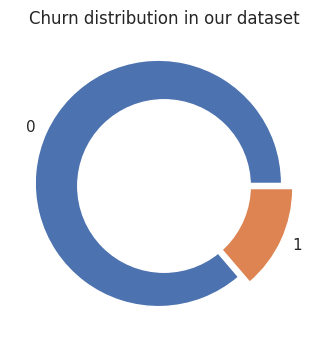

In [59]:
plt.pie(resp_counts.values,labels=resp_counts.index,pctdistance=0.85,explode=[0.05,0.05])
circ = plt.Circle((0,0),0.7,fc='white')
fig = plt.gcf()
fig.gca().add_artist(circ)
plt.title('Churn distribution in our dataset')

In [76]:
mod_dec_tree = DecisionTreeClassifier()

In [77]:
mod_dec_tree = mod_dec_tree.fit(x_train,y_train)

In [79]:
pred_tree = mod_dec_tree.predict(x_test)

In [81]:
print(classification_report(y_test,pred_tree))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        73
           1       0.22      0.22      0.22         9

    accuracy                           0.83        82
   macro avg       0.56      0.56      0.56        82
weighted avg       0.83      0.83      0.83        82



[Text(0.26865671641791045, 0.95, 'Good Response on Phone <= 2.5\ngini = 0.263\nsamples = 122\nvalue = [103, 19]\nclass = 0'),
 Text(0.11940298507462686, 0.85, 'Distance to residence <= 7.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]\nclass = 1'),
 Text(0.05970149253731343, 0.75, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = 1'),
 Text(0.1791044776119403, 0.75, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(0.417910447761194, 0.85, 'Errors in Passbook entries <= 4.5\ngini = 0.201\nsamples = 115\nvalue = [102, 13]\nclass = 0'),
 Text(0.29850746268656714, 0.75, 'Distance to residence <= 7.5\ngini = 0.494\nsamples = 9\nvalue = [5, 4]\nclass = 0'),
 Text(0.23880597014925373, 0.65, 'Enough parking place <= 1.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = 0'),
 Text(0.1791044776119403, 0.55, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.29850746268656714, 0.55, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = 0'),
 Text(0.3582089552238806, 0.65, 'gini

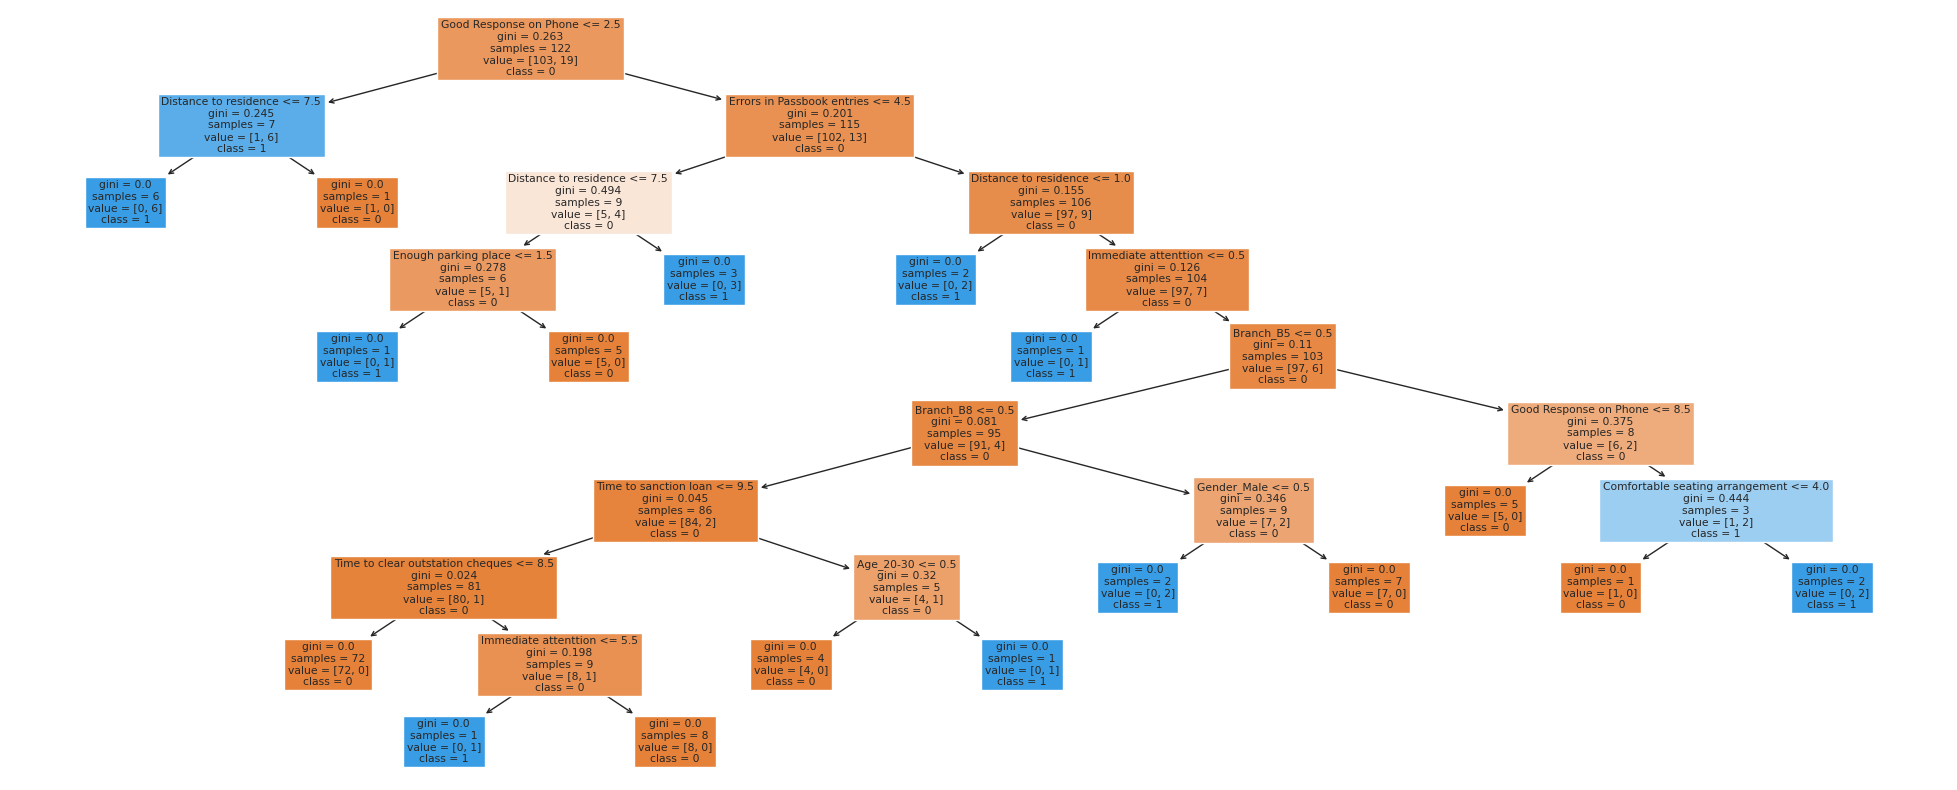

In [99]:
fig = plt.figure(figsize=(25,10))
plot_tree(mod_dec_tree,feature_names=x_train.columns,class_names=['0','1'],filled=True)

In [82]:
accuracy_score(y_test,pred_tree)

0.8292682926829268

Discarding the Logistic Regression Model due to occurence of convergence problems and the Hauck-Donner phenomenon.